<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/ExtendTank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

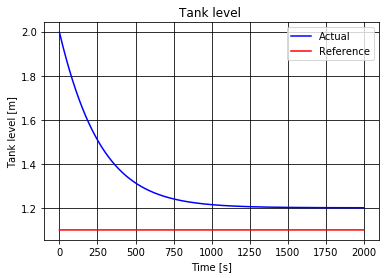

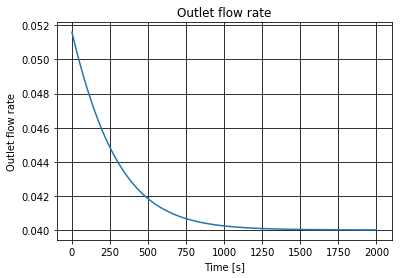

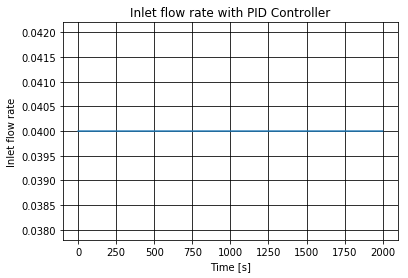

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ts=1
Tf=2000
qinn = 0.03333 # [m3/s] (2000 l/min)
h=2#[m]
A=4 #[ m]
rho=1000
g=9.81
k_f=23
L=40
A_p=0.05
v=np.sqrt(rho*h*g*A_p/L/k_f)
e=0

# Only Implement PI controller
Kp=5
Ti = 0.1

h_setp = 1.1

# min and max values
h_max = 2
h_min = 0
qinn_max = 0.04
qinn_min = 0

# store the data
h_ar=np.array([0])
v_ar=np.array([0])
q_ar=np.array([0])

#initial vaule of feedforward controller
uff = 0
ufr = 0
u=0.04

for i in range(0,Tf,Ts):
    #scale process variables to controller
    r = ((h_setp-h_min)/h_max)*100.0 # reference
    y = ((h-h_min)/h_max)*100.0 # controlled variabl
    
    u = ((u-qinn_min)/qinn_max)*100.0 # manipulated varia
    
    #Store previous values
    last_e = e
    e=r-y #feedback error
    ufb = u
    
    #PI Controller
    delta_u=Kp*(e-last_e)+(Ti*Ts)*e
    ufb=ufb+delta_u*0
    
    #PI controller+feed forward controller
    u = ufb #( feedback + ff dist + ff ref)
    u = qinn_min + qinn_max*(u/100.0)
    
    if u<=qinn_min:
        u=0
    
    if u>qinn_max:
        u=qinn_max
    
    #simulere med ny regulatorsetting (z)
    deltah=(1/A)*(u*Ts-A_p*v*Ts)
    h=h+deltah
    
    deltav=(h*g/L-k_f*v**2/rho/A_p)*Ts
    v=v+deltav
    # verify min,max levels in tank
    if h<=0:
        h=np.array(0)
    if h>2:
        h=np.array(2)
    #store to arrays
    #h_ar=[h_ar,h]
    h_ar=np.concatenate([h_ar,np.array([h])])
    #v_ar=[v_ar,v*A_p]
    v_ar=np.concatenate([v_ar,np.array([v*A_p])])
    #q_ar=[q_ar,u]
    q_ar=np.concatenate([q_ar,np.array([u])])

h_ar=np.delete(h_ar,0)
v_ar=np.delete(v_ar,0)
q_ar=np.delete(q_ar,0)


plt.figure(1)
plt.plot(np.arange(0,Tf,Ts),h_ar,'b')
plt.plot(np.arange(0,Tf,Ts),np.ones(2000)*h_setp,'r')
plt.legend(['Actual','Reference'])
plt.xlabel('Time [s]')
plt.ylabel('Tank level [m]')
plt.title('Tank level ')
plt.grid(color='k')


plt.figure(2)
plt.plot(np.arange(0,Tf,Ts),v_ar)
plt.xlabel('Time [s]')
plt.ylabel('Outlet flow rate')
plt.title('Outlet flow rate')
plt.grid(color='k')

plt.figure(3)
plt.plot(np.arange(0,Tf,Ts),q_ar)
plt.xlabel('Time [s]')
plt.ylabel('Inlet flow rate')
plt.title('Inlet flow rate with PID Controller')
plt.grid(color='k')

